In [3]:
from moviepy.editor import AudioFileClip

# Đường dẫn đến file audio hoặc video
input_file = "/home/thiendc/projects/video_summarization/data/sample_tv360/audio_raw/audio_raw_1.wav"  # hoặc file .mp3, .wav
output_file = "output_audio_7m40s_8m20s.wav"

# Định nghĩa thời gian bắt đầu và kết thúc (theo giây)
start_time = 7 * 60 + 40  # 7 phút 40 giây
end_time = 8 * 60 + 20  # 8 phút 20 giây

# Đọc và trích xuất đoạn audio
audio_clip = AudioFileClip(input_file).subclip(start_time, end_time)
audio_clip.write_audiofile(output_file)


MoviePy - Writing audio in output_audio_7m40s_8m20s.wav


MoviePy - Done.


In [5]:
from pydub import AudioSegment

# Đường dẫn đến file video
input_file = "output_audio_7m40s_8m20s.wav"
output_file = "output_first_40_seconds.wav"

audio = AudioSegment.from_file(input_file)

# Trích xuất 40 giây đầu (theo mili giây)
extracted_audio = audio[:40 * 1000]  # 40 giây đầu

# Lưu file âm thanh đã trích xuất
extracted_audio.export(output_file, format="wav")


<_io.BufferedRandom name='output_first_40_seconds.wav'>

In [9]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import numpy 

# Đường dẫn đến file âm thanh
input_file = "output_first_40_seconds.wav"

# Load âm thanh
y, sr = librosa.load(input_file)

# Tính năng lượng của từng frame
frame_length = 2048
hop_length = 512
# energy = np.array([
#     sum(abs(y[i:i+frame_length]**2))
#     for i in range(0, len(y), hop_length)
# ])
energy = librosa.feature.rms(y= y, frame_length=frame_length, hop_length=hop_length)[0]
# Tạo trục thời gian tính bằng giây cho mỗi khung năng lượng
times = np.arange(len(energy)) * hop_length / sr

# Tìm các đoạn có mức năng lượng > 2 và < 5
energy_threshold_min = numpy.percentile(energy, 50)
energy_threshold_max = 10
selected_times = []
start = None

for i, e in enumerate(energy):
    if energy_threshold_min < e < energy_threshold_max:
        if start is None:
            start = times[i]
    else:
        if start is not None:
            end = times[i]
            selected_times.append((start, end))
            start = None

# Nếu có đoạn phù hợp đến cuối mảng
if start is not None:
    selected_times.append((start, times[-1]))
    
    
# Các khoảng thời gian thỏa mãn điều kiện ban đầu (kết quả đã có)
time_intervals = selected_times

# Điều kiện khoảng cách tối đa giữa các đoạn là 3 giây
max_gap = 2.0

# Khởi tạo các nhóm khoảng thời gian liên tiếp
merged_intervals = []
current_group = [time_intervals[0]]

for i in range(1, len(time_intervals)):
    start, end = time_intervals[i]
    last_end = current_group[-1][1]
    
    # Kiểm tra nếu khoảng cách giữa hai đoạn nhỏ hơn 3 giây
    if start - last_end <= max_gap:
        current_group.append((start, end))
    else:
        # Thêm nhóm hiện tại vào danh sách và bắt đầu nhóm mới
        merged_intervals.append(current_group)
        current_group = [(start, end)]

# Thêm nhóm cuối cùng vào danh sách
if current_group:
    merged_intervals.append(current_group)

# Tìm nhóm dài nhất (tổng thời gian lớn nhất)
longest_interval = max(merged_intervals, key=lambda group: group[-1][1] - group[0][0])

# Kết quả khoảng thời gian dài nhất
longest_start = longest_interval[0][0]
longest_end = longest_interval[-1][1]
print(f"Đoạn dài nhất có mức năng lượng từ 2 đến 5 nằm từ {longest_start:.2f} giây đến {longest_end:.2f} giây")

# # In kết quả các khoảng thời gian thỏa mãn điều kiện
# print("Các khoảng thời gian có mức năng lượng > 2 và < 5:")
# for start, end in selected_times:
#     print(f"Từ {start:.2f} giây đến {end:.2f} giây")

# # Vẽ biểu đồ năng lượng để trực quan hóa
# plt.figure(figsize=(10, 4))
# plt.plot(times, energy, label="Energy")
# plt.axhline(y=energy_threshold_min, color='r', linestyle='--', label="Min Threshold")
# plt.axhline(y=energy_threshold_max, color='g', linestyle='--', label="Max Threshold")
# plt.fill_between(times, energy_threshold_min, energy_threshold_max, where=((energy > energy_threshold_min) & (energy < energy_threshold_max)), color="b", alpha=0.3)
# plt.title("Energy of Audio Signal Over Time")
# plt.xlabel("Time (s)")
# plt.ylabel("Energy")
# plt.legend()
# plt.show()


Đoạn dài nhất có mức năng lượng từ 2 đến 5 nằm từ 16.09 giây đến 37.80 giây


In [10]:
energy

array([0.04078446, 0.04985603, 0.06449883, ..., 0.01561758, 0.01534726,
       0.01314965], dtype=float32)

In [13]:
import numpy
numpy.percentile(energy, 50)

2.6563224880252783

In [1]:
import librosa
import numpy as np

# Đường dẫn đến file âm thanh
input_file = "/home/thiendc/projects/video_summarization/v2/output_first_40_seconds.wav"

#  Load file âm thanh
y, sr = librosa.load(input_file)

# Chuẩn hóa từ [-1, 1] về [0, 1]
y_scaled = (y + 1) / 2

# Chuyển đổi giây 29 thành mẫu
start_sample = int(1 * sr)
end_sample = start_sample + 2*sr  # Lấy một giây từ giây 29

# Tính mức năng lượng tại giây 29 (trung bình bình phương biên độ)
energy_29s = np.sum(y_scaled[start_sample:end_sample]**2) / (end_sample - start_sample)
print(f"Mức năng lượng tại giây thứ 29 (sau khi scale) là: {energy_29s}")


Mức năng lượng tại giây thứ 29 (sau khi scale) là: 0.2533657746952948


In [26]:
import librosa
import numpy as np
from pydub import AudioSegment

# Đường dẫn đến file âm thanh
input_file = "/home/thiendc/projects/video_summarization/v2/output_first_40_seconds.wav"
output_file = "extracted_silence_segment.wav"

# Load file âm thanh
y, sr = librosa.load(input_file)

# Chuẩn hóa y về [0, 1]
y_scaled = (y + 1) / 2

# Đặt ngưỡng biên độ (ví dụ: 0.05, bạn có thể điều chỉnh)
threshold = 0.35

# Tính toán khoảng thời gian tối thiểu cho đoạn liên tục (ví dụ: 1 giây)
min_duration = 1.0  # tính bằng giây
min_samples = int(min_duration * sr)

# Tìm các đoạn có giá trị y_scaled < threshold
below_threshold = np.where(y_scaled < threshold, 1, 0)

# Tìm các đoạn liên tục dưới ngưỡng
continuous_segments = []
start = None

for i in range(len(below_threshold)):
    if below_threshold[i] == 1:
        if start is None:
            start = i
    elif start is not None:
        if i - start >= min_samples:
            # Đoạn liên tục đủ dài, lưu lại
            continuous_segments.append((start, i))
        start = None

# Kiểm tra nếu vẫn còn đoạn liên tục đến cuối
if start is not None and len(below_threshold) - start >= min_samples:
    continuous_segments.append((start, len(below_threshold)))

# Nếu có các đoạn phù hợp, trích xuất đoạn đầu tiên
if continuous_segments:
    start_sample, end_sample = continuous_segments[len(continuous_segments) // 2]  # lấy đoạn giữa
    start_time = start_sample / sr  # chuyển sang giây
    end_time = end_sample / sr  # chuyển sang giây
    
    print(f"Đoạn âm thanh liên tục có biên độ thấp từ {start_time:.2f}s đến {end_time:.2f}s")

    # Trích xuất và lưu đoạn âm thanh
    audio = AudioSegment.from_wav(input_file)
    extracted_audio = audio[start_time * 1000:end_time * 1000]  # chuyển từ giây sang mili giây
    extracted_audio.export(output_file, format="wav")
    print(f"Đoạn âm thanh đã được lưu vào {output_file}")
else:
    print("Không tìm thấy đoạn nào phù hợp với điều kiện đã đặt.")


Không tìm thấy đoạn nào phù hợp với điều kiện đã đặt.


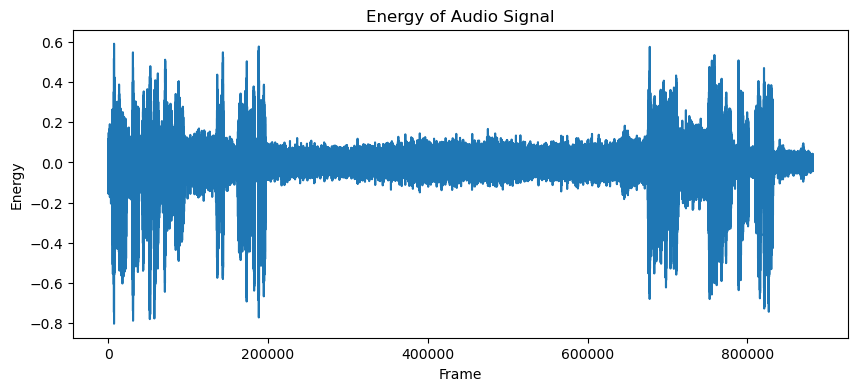

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title("Energy of Audio Signal")
plt.xlabel("Frame")
plt.ylabel("Energy")
plt.show()

In [20]:
# Các khoảng thời gian thỏa mãn điều kiện ban đầu (kết quả đã có)
time_intervals = selected_times

# Điều kiện khoảng cách tối đa giữa các đoạn là 3 giây
max_gap = 2.0

# Khởi tạo các nhóm khoảng thời gian liên tiếp
merged_intervals = []
current_group = [time_intervals[0]]

for i in range(1, len(time_intervals)):
    start, end = time_intervals[i]
    last_end = current_group[-1][1]
    
    # Kiểm tra nếu khoảng cách giữa hai đoạn nhỏ hơn 3 giây
    if start - last_end <= max_gap:
        current_group.append((start, end))
    else:
        # Thêm nhóm hiện tại vào danh sách và bắt đầu nhóm mới
        merged_intervals.append(current_group)
        current_group = [(start, end)]

# Thêm nhóm cuối cùng vào danh sách
if current_group:
    merged_intervals.append(current_group)

# Tìm nhóm dài nhất (tổng thời gian lớn nhất)
longest_interval = max(merged_intervals, key=lambda group: group[-1][1] - group[0][0])

# Kết quả khoảng thời gian dài nhất
longest_start = longest_interval[0][0]
longest_end = longest_interval[-1][1]
print(f"Đoạn dài nhất có mức năng lượng từ 2 đến 5 nằm từ {longest_start:.2f} giây đến {longest_end:.2f} giây")


Đoạn dài nhất có mức năng lượng từ 2 đến 5 nằm từ 16.04 giây đến 37.76 giây


In [1]:
from src.match_timeline.whistle_detection import AudioEnergyDetector
from src.match_timeline.base.base_model import AudioEnergyConfig

In [2]:
detector = AudioEnergyDetector()
custom_config = AudioEnergyConfig(
    frame_length=2048,
    hop_length=512,
    energy_percentile=50,
    energy_max=10.0,
    max_gap=2.0
)

detector = AudioEnergyDetector(custom_config)

# Phân tích file
file_path = "output_first_40_seconds.wav"
longest_segment = detector.analyze_file(file_path)


In [3]:
longest_segment

AudioSegment(start_time=16.091428571428573, end_time=37.802086167800454)